In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## Step.0 Preprocess dataset

In [3]:
# take a look
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Conclusion:  
1. 11 features, but 'id' is meaningless, so we drop it in next step.
2. Note that bmi has Nan data. Here we drop the Nan data
3. 'gender','even_married','work_type','residence_type','smoking_status' is char data, we need to convert in to int data. Here we use LabelEncoder().
4. (TBD)Can obvious distributions of 'age','avg_glucose_level' and 'bmi', binning them.
5. Had to normalize the 'age','avg_glucose_level' and 'bmi' data.
6. The mean of 'stroke' is very small, means that most of y is 0. It would cause imbalance.A solution is SMOTE

 

In [6]:
# drop the 'id'
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# 
df.dropna(axis = 0, inplace=True)
df['bmi'].isnull().sum()

0

In [8]:
#labelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [10]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

### 1. PCA & SPCA & Kernel PCA

#### PCA

In [11]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [12]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [13]:
pca = PCA(n_components=6)
data = pca.fit_transform(x)

In [14]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.29277711, 0.13221457, 0.11111289, 0.10192724, 0.09218025,
       0.08964516])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29277711, 0.42499169, 0.53610458, 0.63803182, 0.73021207,
       0.81985724])

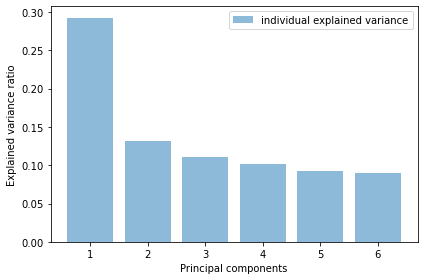

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(range(1,7), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
#loading of first six Principal Components
# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# https://www.reneshbedre.com/blog/principal-component-analysis.html
# variance
# cumulative variance
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'], index = df.iloc[:,1:-1].columns)
loadings

In [ ]:
ax = sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()

#### SPCA

In [ ]:
np.random.seed(42)
spca = SparsePCA(n_components=6)
data = spca.fit_transform(x)

In [ ]:
spca.components_

In [ ]:
spca_loadings = pd.DataFrame(spca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'], index = df.iloc[:,1:-1].columns)
spca_loadings

In [ ]:
np.shape(x)

In [ ]:
# explained variance ratios
# https://stats.stackexchange.com/questions/438508/what-does-sparse-pca-implementation-in-python-do
#https://www.datatechnotes.com/2021/01/sparsepca-projection-example-in-python.html
t_spca = spca.transform(x)
p_spca = spca.components_.T
t_spca_qr = np.linalg.qr(t_spca) 
r = t_spca_qr[1]
# compute adjusted variance
variance = []
for i in range(6):
    variance.append(np.square(r[i][i])/4909)
variance = np.array(variance)
variance

In [ ]:
fro_comp0 = np.linalg.norm(np.outer(t_spca[0], spca.components_[0]), 'fro')
fro_full = np.linalg.norm(x, 'fro')
var_exp0 = fro_comp0 ** 2. / fro_full ** 2.
print(fro_comp0, fro_full, var_exp0)

In [ ]:
print('Mean f1 scores of PCA:')
print('Random Forest mean :',rf_cv.mean())
print('SVM mean :',svm_cv.mean())
print('Logistic Regression mean :',logreg_cv.mean())

In [ ]:
#SPCA
rf_pipeline = Pipeline(steps = [('PCA',SparsePCA(n_components=8)),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('PCA',SparsePCA(n_components=8)),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('PCA',SparsePCA(n_components=8)),('LR',LogisticRegression(random_state=42))])

rf_cv = cross_val_score(rf_pipeline,x_train_res,y_train_res,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,x_train_res,y_train_res,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,x_train_res,y_train_res,cv=10,scoring='f1')

In [ ]:
print('Mean f1 scores of SPCA:')
print('Random Forest mean :',rf_cv.mean())
print('SVM mean :',svm_cv.mean())
print('Logistic Regression mean :',logreg_cv.mean())

### split training set and testing set, normalization and SMOTE

In [ ]:
#split training set and testing set
X = df.drop('stroke',axis=1) 
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 43)

In [ ]:
# normalize above feature(min_max_scaler)
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [ ]:
#SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=43)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

## build model

### model without any PCA

#### LR 

In [ ]:
#baseline, with 10-fold CV
lr = LogisticRegression(penalty='l2',random_state=42)
lr.fit(x_train_res,y_train_res)
scoring =['accuracy','roc_auc']
error = cross_validate(lr, x_train_res, y_train_res,cv=10, scoring=scoring, return_train_score=True)
error

In [ ]:
print('train_accuracy:',error['train_accuracy'].mean())
print('validation_accuracy:',error['test_accuracy'].mean())

print('train_roc_auc:',error['train_roc_auc'].mean())
print('validation_roc_auc:',error['test_roc_auc'].mean())

#### SVM

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train_res,y_train_res)
scoring =['accuracy','roc_auc']
error = cross_validate(svm, x_train_res, y_train_res,cv=10, scoring=scoring, return_train_score=True)
error

In [ ]:
print('train_accuracy:',error['train_accuracy'].mean())
print('validation_accuracy:',error['test_accuracy'].mean())

print('train_roc_auc:',error['train_roc_auc'].mean())
print('validation_roc_auc:',error['test_roc_auc'].mean())

#### Randomforest

In [ ]:
rdf = RandomForestClassifier(random_state=42)
rdf.fit(x_train_res,y_train_res)
scoring =['accuracy','roc_auc']
error = cross_validate(rdf, x_train_res, y_train_res,cv=10, scoring=scoring, return_train_score=True)
error

In [ ]:
print('train_accuracy:',error['train_accuracy'].mean())
print('validation_accuracy:',error['test_accuracy'].mean())

print('train_roc_auc:',error['train_roc_auc'].mean())
print('validation_roc_auc:',error['test_roc_auc'].mean())

### standard PCA

#### LR

In [ ]:
#pca 
pca = PCA(n_components=3) #pca:n_components=3
lr = LogisticRegression(penalty='l2',random_state=42)
x_train_pca = pca.fit_transform(x_train_res)
lr.fit(x_train_pca,y_train_res)
scoring =['accuracy','roc_auc']
error = cross_validate(lr, x_train_pca, y_train_res,cv=10, scoring=scoring, return_train_score=True)
error

In [ ]:
print('train_accuracy:',error['train_accuracy'].mean())
print('validation_accuracy:',error['test_accuracy'].mean())

print('train_roc_auc:',error['train_roc_auc'].mean())
print('validation_roc_auc:',error['test_roc_auc'].mean())

#### SVM

In [ ]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train_pca,y_train_res)
scoring =['accuracy','roc_auc']
error = cross_validate(svm, x_train_pca, y_train_res,cv=10, scoring=scoring, return_train_score=True)
error

In [ ]:
print('train_accuracy:',error['train_accuracy'].mean())
print('validation_accuracy:',error['test_accuracy'].mean())

print('train_roc_auc:',error['train_roc_auc'].mean())
print('validation_roc_auc:',error['test_roc_auc'].mean())

#### RandomForest

In [ ]:
rdf = RandomForestClassifier(random_state=42)
rdf.fit(x_train_pca,y_train_res)
scoring =['accuracy','roc_auc']
error = cross_validate(rdf, x_train_pca, y_train_res,cv=10, scoring=scoring, return_train_score=True)
error

In [ ]:
print('train_accuracy:',error['train_accuracy'].mean())
print('validation_accuracy:',error['test_accuracy'].mean())

print('train_roc_auc:',error['train_roc_auc'].mean())
print('validation_roc_auc:',error['test_roc_auc'].mean())